Le code suivant est fait pour analyser les images pour detecter des patalogiesrespiratoire : covid, pneumonie bacterienne et virale

Source des image: 

In [39]:
import os,shutil

base_dir =  '/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all'

#repertoire contenant les données d'entrainement et de test

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

# Dictionnaire regroupant les répertoires et leur nom associé
dirs = {
    'train_covid_dir': os.path.join(train_dir, 'covid'),
    'train_normal_dir': os.path.join(train_dir, 'normal'),
    'train_pneumonia_bac_dir': os.path.join(train_dir, 'pneumonia_bac'),
    'train_pneumonia_vir_dir': os.path.join(train_dir, 'pneumonia_vir'),
    'test_covid_dir': os.path.join(test_dir, 'covid'),
    'test_normal_dir': os.path.join(test_dir, 'normal'),
    'test_pneumonia_bac_dir': os.path.join(test_dir, 'pneumonia_bac'),
    'test_pneumonia_vir_dir': os.path.join(test_dir, 'pneumonia_vir')
}

# Affichage du nombre de fichiers dans chaque répertoire
for key, path in dirs.items():
    count = len(os.listdir(path))
    print(f"Il y a {count} fichiers dans {key}")

"""
train_covid_dir = os.path.join(train_dir,'covid')
train_normal_dir = os.path.join(train_dir,'normal')
train_pneumonia_bac_dir = os.path.join(train_dir,'pneumonia_bac')
train_pneumonia_vir_dir = os.path.join(train_dir,'pneumonia_vir')

test_covid_dir = os.path.join(test_dir,'covid')
test_normal_dir = os.path.join(test_dir,'normal')
test_pneumonia_bac_dir = os.path.join(test_dir,'pneumonia_bac')
test_pneumonia_vir_dir = os.path.join(test_dir,'pneumonia_vir')
"""

Il y a 60 fichiers dans train_covid_dir
Il y a 70 fichiers dans train_normal_dir
Il y a 70 fichiers dans train_pneumonia_bac_dir
Il y a 71 fichiers dans train_pneumonia_vir_dir
Il y a 9 fichiers dans test_covid_dir
Il y a 9 fichiers dans test_normal_dir
Il y a 9 fichiers dans test_pneumonia_bac_dir
Il y a 10 fichiers dans test_pneumonia_vir_dir


"\ntrain_covid_dir = os.path.join(train_dir,'covid')\ntrain_normal_dir = os.path.join(train_dir,'normal')\ntrain_pneumonia_bac_dir = os.path.join(train_dir,'pneumonia_bac')\ntrain_pneumonia_vir_dir = os.path.join(train_dir,'pneumonia_vir')\n\ntest_covid_dir = os.path.join(test_dir,'covid')\ntest_normal_dir = os.path.join(test_dir,'normal')\ntest_pneumonia_bac_dir = os.path.join(test_dir,'pneumonia_bac')\ntest_pneumonia_vir_dir = os.path.join(test_dir,'pneumonia_vir')\n"

affichons une image pour voir ces caracteristiques

les dimensions des images sont : (439, 362)


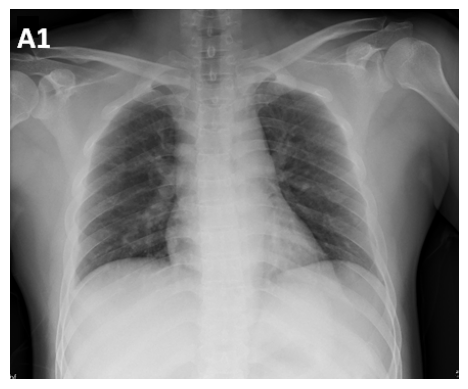

In [40]:
from PIL import Image
import matplotlib.pyplot as plt

target_dir = dirs['train_covid_dir']

first_image = os.listdir(target_dir)[0]
first_image_path = os.path.join(target_dir,first_image)
img = Image.open(first_image_path)

#les caracteristiques de l'imges
print(f"les dimensions des images sont : {img.size}")

# affichage de l'image
plt.imshow(img)
plt.axis("off")
plt.show()

## creation de l'architecture du reseau

In [41]:
from keras import layers,models
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization, Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(400,350,3)))
model.add(BatchNormalization())  # Ajout de BatchNorm pour stabiliser
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.2))  # Réduction du sur-apprentissage

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # 4 classes

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 398, 348, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 398, 348, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 199, 174, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 199, 174, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 197, 172, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 197, 172, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 98, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 98, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 96, 84, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 96, 84, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 48, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 48, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 258048)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │   132,121,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,217,284 (504.37 MB)

 Trainable params: 132,216,836 (504.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [42]:
model.compile(
    optimizer='adam',                     # Adam est un optimiseur adaptatif efficace et robuste par défaut.
    loss='categorical_crossentropy',      # Utilisé pour la classification multi‑classe avec des labels one-hot encodés.
    metrics=['accuracy']                  # Pour suivre la performance en termes de précision.
)

### Pretaitement des données

Found 270 images belonging to 4 classes.


Found 36 images belonging to 4 classes.


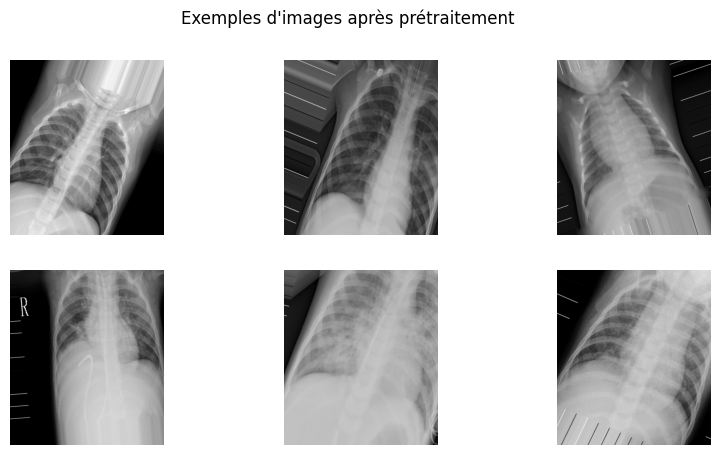

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définition des répertoires
base_dir = '/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Générateur pour l'entraînement avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Générateur pour les tests : seule la normalisation
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateur d'images pour l'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(400, 350),
    batch_size=20,
    class_mode='categorical'
)

# Générateur d'images pour le test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(400, 350),
    batch_size=20,
    class_mode='categorical'
)

# Affichage d'un échantillon d'images prétraitées
sample_batch, _ = next(train_generator)
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_batch[i])
    plt.axis("off")
plt.suptitle("Exemples d'images après prétraitement")
plt.show()

In [44]:
epochs = 60  # Vous pouvez ajuster le nombre d'epochs selon votre dataset

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Sauvegarde du modèle (format HDF5 ou le nouveau format Keras selon la version)
model.save('covid_pneumonia_model.h5')

Epoch 1/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.4279 - loss: 88.4336 - val_accuracy: 0.2500 - val_loss: 49.9589
Epoch 2/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.4566 - loss: 70.9607 - val_accuracy: 0.2500 - val_loss: 66.7511
Epoch 3/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.5077 - loss: 49.4284 - val_accuracy: 0.2500 - val_loss: 156.0379
Epoch 4/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.6025 - loss: 36.7975 - val_accuracy: 0.2500 - val_loss: 182.2193
Epoch 5/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.6466 - loss: 24.9375 - val_accuracy: 0.2500 - val_loss: 125.3955
Epoch 6/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.6694 - loss: 20.8277 - val_accuracy: 0.2500 - val_loss: 158.3654
Epoch 7/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.5564 - loss: 23.0641 - val_accuracy: 0.2500 - val_loss: 155.2117
Epoch 8/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.5488 - loss: 19.6374 - val_accuracy

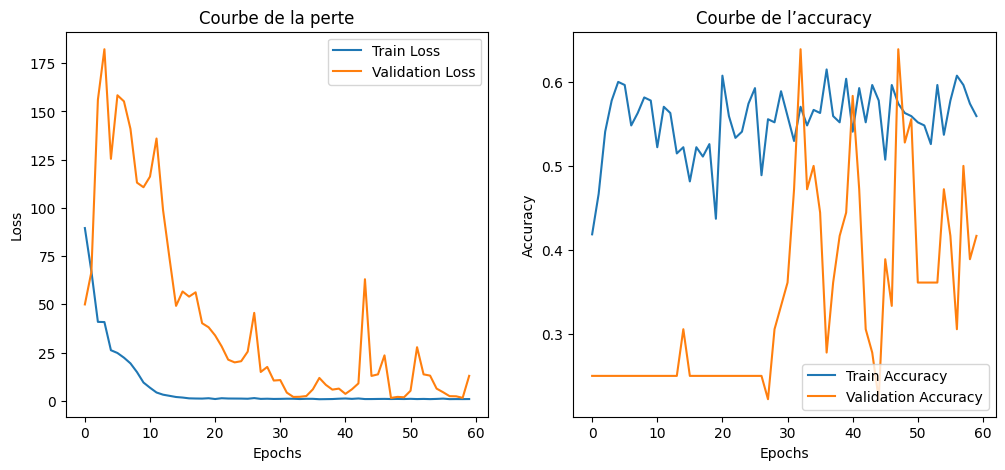

In [45]:
# Affichage des courbes d'entraînement
plt.figure(figsize=(12, 5))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Courbe de la perte')
plt.legend()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Courbe de l’accuracy')
plt.legend()

plt.show()

In [46]:
# Évaluation sur le jeu de test
loss, accuracy = model.evaluate(test_generator)
print("📊 Résultats du modèle sur l’ensemble de test :")
print(f"   Loss (perte) : {loss:.4f}")
print(f"   Accuracy : {accuracy:.4f} (soit {accuracy*100:.2f}%)")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step - accuracy: 0.3944 - loss: 14.4361
📊 Résultats du modèle sur l’ensemble de test :
   Loss (perte) : 12.9439
   Accuracy : 0.4167 (soit 41.67%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
L’image est classée comme : PNEUMONIA_BAC


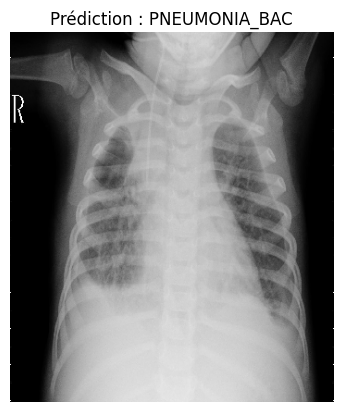

In [48]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Exemple de prédiction sur une image
# Chemin vers une image test (à adapter selon votre environnement)
image_path = "/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all/train/pneumonia_bac/person1935_bacteria_4850.jpeg"
img = image.load_img(image_path, target_size=(400, 350))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisation

predictions = model.predict(img_array)

# Les classes doivent être dans le même ordre que celles générées par flow_from_directory
classes = ["COVID", "NORMAL", "PNEUMONIA_BAC", "PNEUMONIA_VIR"]
predicted_class = classes[np.argmax(predictions)]
print(f"L’image est classée comme : {predicted_class}")

plt.imshow(img)
plt.title(f"Prédiction : {predicted_class}")
plt.axis("off")
plt.show()